# Applied Machine Learning, Spring 2020
## Bhaskar Ghosh, bg2625
### Notebook for Task 1

Import all necessary libraries

In [0]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, LeaveOneOut, cross_val_score, GridSearchCV, ParameterGrid
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import confusion_matrix
# import category_encoders as ce
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline

Getting the credit-g dataset from Open ML

In [0]:
# credit_dataX, credit_datay = fetch_openml('credit-g', version='active', as_frame=True, return_X_y =True)
credit_data = fetch_openml('credit-g', version='active')

### 1.1 Determine which features are continuous and which are categorical.
All the feature names are listed below:

In [72]:
credit_data.feature_names

['checking_status',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'age',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker']

All the categorical features are listed below:

In [73]:
credit_data.categories

{'checking_status': ['<0', '0<=X<200', '>=200', 'no checking'],
 'credit_history': ['no credits/all paid',
  'all paid',
  'existing paid',
  'delayed previously',
  'critical/other existing credit'],
 'employment': ['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7'],
 'foreign_worker': ['yes', 'no'],
 'housing': ['rent', 'own', 'for free'],
 'job': ['unemp/unskilled non res',
  'unskilled resident',
  'skilled',
  'high qualif/self emp/mgmt'],
 'other_parties': ['none', 'co applicant', 'guarantor'],
 'other_payment_plans': ['bank', 'stores', 'none'],
 'own_telephone': ['none', 'yes'],
 'personal_status': ['male div/sep',
  'female div/dep/mar',
  'male single',
  'male mar/wid',
  'female single'],
 'property_magnitude': ['real estate',
  'life insurance',
  'car',
  'no known property'],
 'purpose': ['new car',
  'used car',
  'furniture/equipment',
  'radio/tv',
  'domestic appliance',
  'repairs',
  'education',
  'vacation',
  'retraining',
  'business',
  'other'],
 'savings_status':

**Categorical features** contain finite number of distinct groups. Going by that definition and looking at the results above, following features can be classified as being categorical:
* checking_status
* credit_history
* employment
* foreign_worker
* housing
* job
* other_parties
* other_payment_plans
* own_telephone
* personal_status
* property_magnitude
* purpose
* savings_status

**Continuous features** can have an infinite range of values. From the above list of features, we can say that the following features are continuous:
* duration
* credit_amount
* installment_commitment (installment rate in percentage of disposable income)
* residence_since (number of years)
* age
* existing_credits
* num_dependents

All the features in the above list are numeric.

### 1.2 Visualize the univariate distribution of each continuous feature, and the distribution of the target.

Converting the given credit data to a dataframe

In [0]:
credit_dataframe = pd.DataFrame(credit_data.data, columns=credit_data.feature_names)
credit_dataframe['class'] = credit_data.target

Plotting graphs for continuous features.
Starting with duration

In [75]:
credit_dataframe.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.0,6.0,4.0,3.0,1169.0,4.0,4.0,4.0,2.0,0.0,4.0,0.0,67.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,good
1,1.0,48.0,2.0,3.0,5951.0,0.0,2.0,2.0,1.0,0.0,2.0,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,bad
2,3.0,12.0,4.0,6.0,2096.0,0.0,3.0,2.0,2.0,0.0,3.0,0.0,49.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,good
3,0.0,42.0,2.0,2.0,7882.0,0.0,3.0,2.0,2.0,2.0,4.0,1.0,45.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0,good
4,0.0,24.0,3.0,0.0,4870.0,0.0,2.0,3.0,2.0,0.0,4.0,3.0,53.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,bad


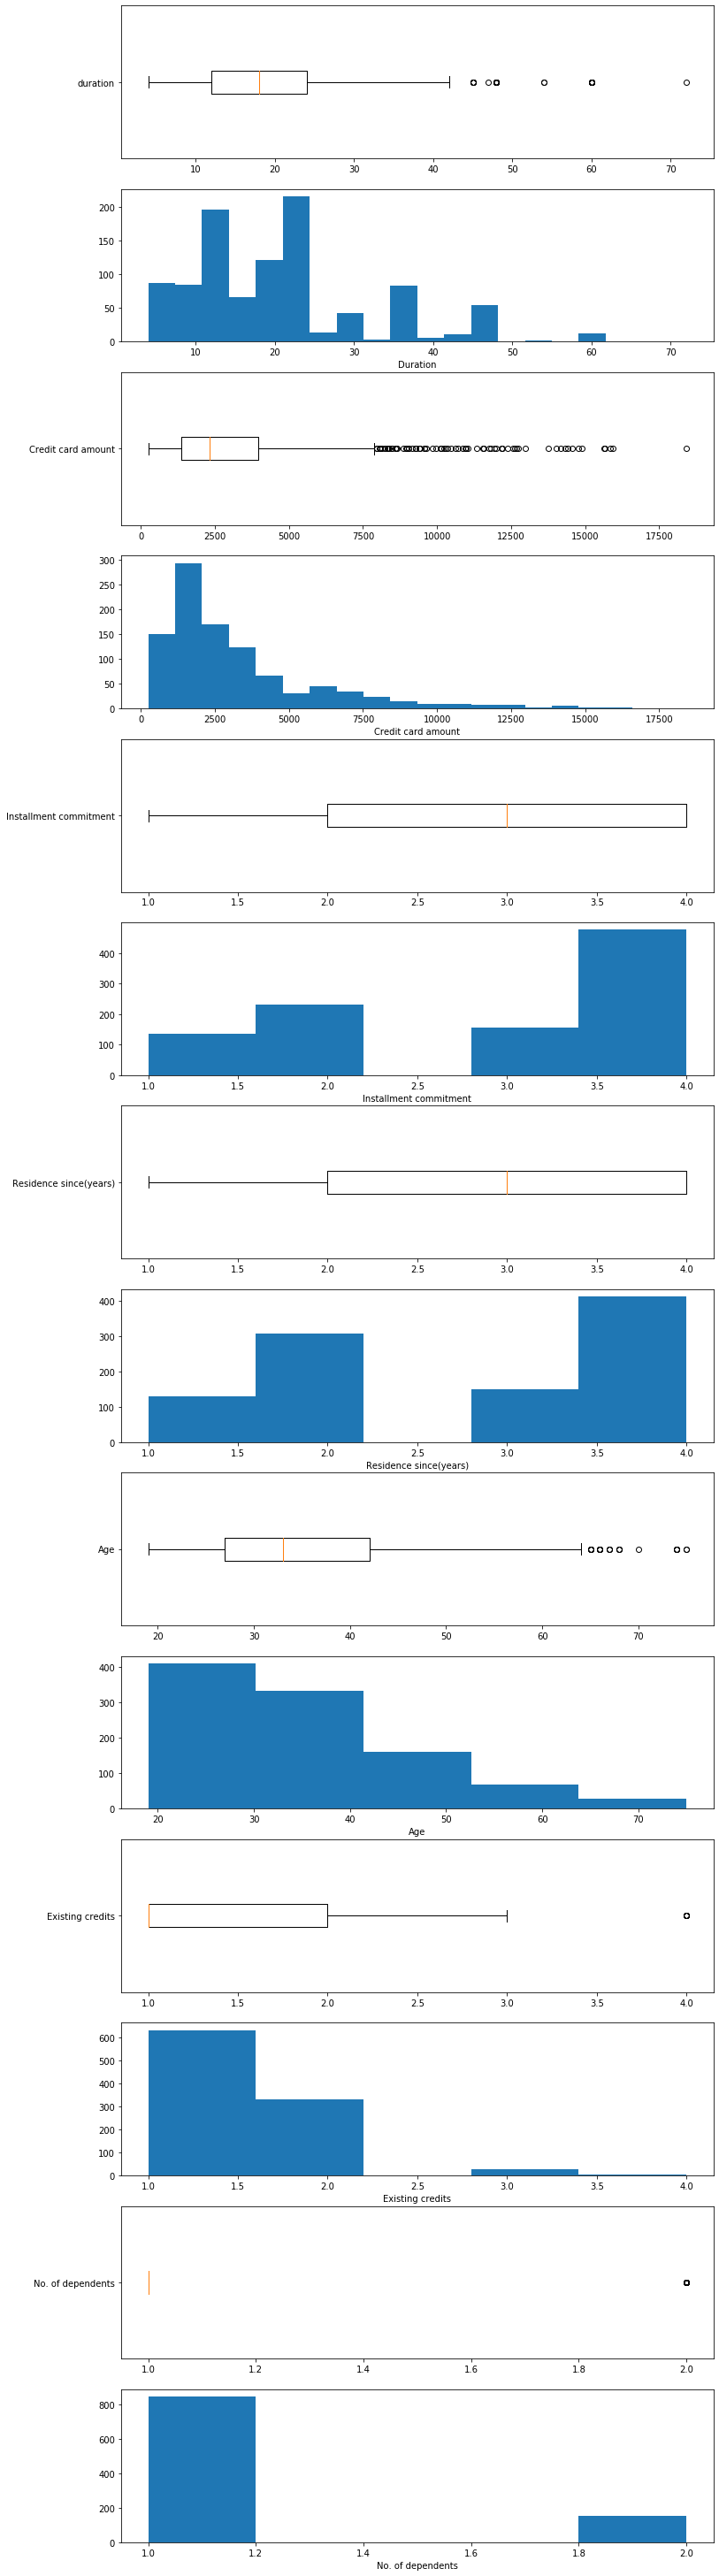

In [76]:
duration_data = credit_dataframe['duration']
credit_amt_data = credit_dataframe['credit_amount']
inst_data = credit_dataframe['installment_commitment']
years_data = credit_dataframe['residence_since']
age_data = credit_dataframe['age']
excredit_data = credit_dataframe['existing_credits']
dep_data = credit_dataframe['num_dependents']

plt.figure(figsize=(12, 40))

# plotting boxplot and histogram for duration
ax71 = plt.subplot(14, 1, 1)
ax71.boxplot(duration_data, vert=False)
ax71.set_yticklabels(['duration'])

ax72 = plt.subplot(14,1,2)
ax72.hist(duration_data, bins=20)
ax72.set_xlabel('Duration')

# plotting box plot and histogram for credit card amount
ax73 = plt.subplot(14, 1, 3)
ax73.boxplot(credit_amt_data, vert=False)
ax73.set_yticklabels(['Credit card amount'])

ax74 = plt.subplot(14, 1, 4)
ax74.hist(credit_amt_data, bins=20)
ax74.set_xlabel('Credit card amount')

# plotting box plot and histogram for installment_commitment
ax75 = plt.subplot(14, 1, 5)
ax75.boxplot(inst_data, vert=False)
ax75.set_yticklabels(['Installment commitment'])

ax76 = plt.subplot(14,1,6)
ax76.hist(inst_data, bins=5)
ax76.set_xlabel('Installment commitment')

# plotting box plot and histogram for residence_since
ax77 = plt.subplot(14, 1, 7)
ax77.boxplot(years_data, vert=False)
ax77.set_yticklabels(['Residence since(years)'])

ax78 = plt.subplot(14, 1, 8)
ax78.hist(years_data, bins=5)
ax78.set_xlabel('Residence since(years)')

# plotting box plot and histogram for age
ax79 = plt.subplot(14, 1, 9)
ax79.boxplot(age_data, vert=False)
ax79.set_yticklabels(['Age'])

ax710 = plt.subplot(14, 1, 10)
ax710.hist(age_data, bins=5)
ax710.set_xlabel('Age')

# plotting box plot and histogram for existing credits
ax711 = plt.subplot(14, 1, 11)
ax711.boxplot(excredit_data, vert=False)
ax711.set_yticklabels(['Existing credits'])

ax712 = plt.subplot(14, 1, 12)
ax712.hist(excredit_data, bins=5)
ax712.set_xlabel('Existing credits')

# plotting box plot and histogram for num_dependents
ax713 = plt.subplot(14, 1, 13)
ax713.boxplot(dep_data, vert=False)
ax713.set_yticklabels(['No. of dependents'])

ax712 = plt.subplot(14, 1, 14)
ax712.hist(dep_data, bins=5)
ax712.set_xlabel('No. of dependents')


plt.subplots_adjust(top=1, bottom=0.004)
plt.show()

Plotting target

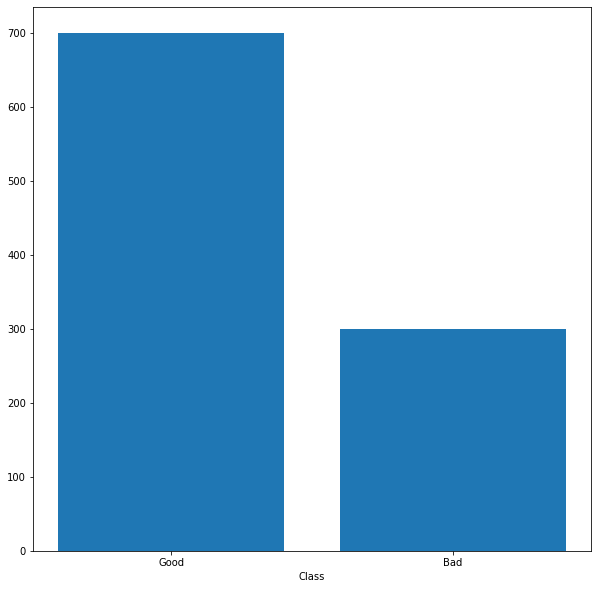

In [77]:
class_ = credit_dataframe['class']
num_good = class_[class_ == 'good']
num_bad = class_[class_ == 'bad']
labels = ['Good', 'Bad']
y_pos = np.arange(2)
x_values = [len(num_good), len(num_bad)]
plt.figure(figsize=(10, 10))
plt.bar(y_pos, x_values)
plt.xticks(np.arange(2), ('Good', 'Bad'))
plt.xlabel('Class')

plt.show()

### 1.3 Creating training and test splits

#### Preprocessing the data
We ordinal encode all the categorical features before creating the training, validation and test splits. We then scale the continuous features.
Converting the data bunch to a data frame seems to have ordinally encoded the categorical variables, but to be on the safe side the following steps use **'as_frame=True'** to download the dataset as a dataframe. We then perform an ordinal encoding on the categorical variables.

In [0]:
credit_dataX, credit_datay = fetch_openml('credit-g', version='active', as_frame=True, return_X_y =True)
categorical_features = ['checking_status', 'credit_history', 'employment', 'foreign_worker',
'housing',
'job',
'other_parties',
'other_payment_plans',
'own_telephone',
'personal_status',
'property_magnitude',
'purpose',
'savings_status']
credit_dataX_ordinal = credit_dataX.copy()
for feature in credit_dataX.iteritems():
  if feature[0] in categorical_features:
    credit_dataX_ordinal[feature[0]] = credit_dataX[feature[0]].astype("category").cat.codes



In [79]:
credit_dataX_ordinal.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0,6.0,4,3,1169.0,4,4,4.0,2,0,4.0,0,67.0,2,1,2.0,2,1.0,1,0
1,1,48.0,2,3,5951.0,0,2,2.0,1,0,2.0,0,22.0,2,1,1.0,2,1.0,0,0
2,3,12.0,4,6,2096.0,0,3,2.0,2,0,3.0,0,49.0,2,1,1.0,1,2.0,0,0
3,0,42.0,2,2,7882.0,0,3,2.0,2,2,4.0,1,45.0,2,2,1.0,2,2.0,0,0
4,0,24.0,3,0,4870.0,0,2,3.0,2,0,4.0,3,53.0,2,2,2.0,2,2.0,0,0


Perorming Label encoding on the target

In [0]:
le = LabelEncoder()
y = le.fit_transform(credit_datay)

Creating the training, validation and test splits

In [0]:
# creating the training test split
X_trainval, X_test, y_trainval, y_test = train_test_split(credit_dataX_ordinal, y)
# creating the training validation split
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

In [0]:
numeric_features = [feature for feature in credit_data.feature_names if feature not in categorical_features]

In [83]:
scaler = StandardScaler()
X_train_scaled = X_train
X_train_scaled[numeric_features] = scaler.fit_transform(X_train_scaled[numeric_features])

X_val_scaled = X_val
X_val_scaled[numeric_features] = scaler.fit_transform(X_val_scaled[numeric_features])

logistic_regression = LogisticRegression().fit(X_train, y_train)
logistic_regression.predict(X_val)
logistic_regression.score(X_val, y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

0.7074468085106383

### 1.4

In [0]:
# creating the training test split anew
X_trainval_pipe, X_test_pipe, y_trainval_pipe, y_test_pipe = train_test_split(credit_dataX, credit_datay)
# creating a Repeated Stratified K fold
skf = StratifiedKFold(n_splits=5, shuffle=True)

#### Logistic Regression (without scaled data)

In [85]:
preprocess_lr = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_lr = make_pipeline(preprocess_lr, LogisticRegression())
model_lr.fit(X_trainval_pipe, y_trainval_pipe)
scores_lr = cross_val_score(model_lr, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_lr)))

score: 0.732


#### Logistic Regression (with scaling)

In [86]:
preprocess_lrs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_lrs = make_pipeline(preprocess_lrs, LogisticRegression())
model_lrs.fit(X_trainval_pipe, y_trainval_pipe)
scores_lrs = cross_val_score(model_lrs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_lrs)))

score: 0.753


#### Linear Support Vector (SVC) without scaling

In [87]:
preprocess_svc = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_svc = make_pipeline(preprocess_svc, LinearSVC())
model_svc.fit(X_trainval_pipe, y_trainval_pipe)
scores_svc = cross_val_score(model_svc, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_svc)))

score: 0.732


#### Linear Support Vector (SVC) with scaling

In [88]:
preprocess_svcs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_svcs = make_pipeline(preprocess_svcs, LinearSVC( max_iter=5000))
model_svcs.fit(X_trainval_pipe, y_trainval_pipe)
scores_svcs = cross_val_score(model_svcs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_svcs)))

score: 0.756


#### Nearest neighbors without scaling

In [89]:
preprocess_knn = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_knn = make_pipeline(preprocess_knn, KNeighborsClassifier())
model_knn.fit(X_trainval_pipe, y_trainval_pipe)
scores_knn = cross_val_score(model_knn, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_knn)))

score: 0.703


#### Nearest neighbors with scaling

In [90]:
preprocess_knns = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_knns = make_pipeline(preprocess_knns, KNeighborsClassifier())
model_knns.fit(X_trainval_pipe, y_trainval_pipe)
scores_knns = cross_val_score(model_knns, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_knns)))

score: 0.729


#### Conclusion
From the results above we see that the accuracy is better when we use scaling on numeric features. For logistic regression, the accuracy improved from 0.732 to 0.745 when the data is scaled. For SVC the accuracy improved from 0.741 to 0.749 and for Nearest neighbors the accuracy improved from 0.716 to 0.738.

## 1.5
Using GridSearchCV

Creating a new split of data, using encoded data points for GridSearchCV

In [0]:
X_trainval, X_test, y_trainval, y_test = train_test_split(credit_dataX_ordinal, y)

#### Tuning for Logistic regression

In [94]:
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
  param_grid = {"logisticregression__C" : np.logspace(-4, 20, 20)}
  grid_lr = GridSearchCV(lr_pipe, param_grid, cv=skf, return_train_score=True)
  grid_lr.fit(X_trainval, y_trainval)
  print("best mean cross-validation score: {:.3f}".format(grid_lr.best_score_))
  print("best parameters: {}".format(grid_lr.best_params_))


best mean cross-validation score: 0.769
best parameters: {'logisticregression__C': 0.615848211066026}


Plugging it back to the pipeline we created for Logistic regression in 1.4, but now with C=0.615848211066026

In [95]:
preprocess_lrs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_lrs = make_pipeline(preprocess_lrs, LogisticRegression(C=0.615848211066026))
model_lrs.fit(X_trainval_pipe, y_trainval_pipe)
scores_lrs = cross_val_score(model_lrs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_lrs)))

score: 0.764


We can observe a marginal improvement in performance from the pipeline we created for Logistic Regression in 1.4. For the scaled model for LogisticRegression in 1.4, the cross validation score was 0.755 and after tuning the score became 0.761.

#### Tuning for SVC

In [97]:
svc_pipe = make_pipeline(StandardScaler(), LinearSVC())
param_grid = {'linearsvc__C': np.logspace(-10, 5, 20)}
grid_svc = GridSearchCV(svc_pipe, param_grid, cv=skf, scoring='accuracy', return_train_score=True)
grid_svc.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_svc.best_score_))
print("best parameters: {}".format(grid_svc.best_params_))
#print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

best mean cross-validation score: 0.769
best parameters: {'linearsvc__C': 0.04832930238571752}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Plugging C back into the SVC pipeline in 1.4, we get

In [99]:
preprocess_svcs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_svcs = make_pipeline(preprocess_svcs, LinearSVC(C=0.04832930238571752))
model_svcs.fit(X_trainval_pipe, y_trainval_pipe)
scores_svcs = cross_val_score(model_svcs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_svcs)))

score: 0.761


There is a slight improvement in performance for SVC, from 0.76 to 0.761

#### Tuning for KNeighborsClassifier

In [100]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors': range(10, 20)}
grid = GridSearchCV(knn_pipe, param_grid, cv=skf, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
#print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.742
best parameters: {'kneighborsclassifier__n_neighbors': 10}


Plugging the kneighborsclassifier__n_neighbors parameter back to the KNN pipeline in 1.4, we get

In [101]:
preprocess_knns = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_knns = make_pipeline(preprocess_knns, KNeighborsClassifier(n_neighbors=10))
model_knns.fit(X_trainval_pipe, y_trainval_pipe)
scores_knns = cross_val_score(model_knns, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_knns)))

score: 0.732


There's an increase in performance in the case of KNeighborsClassifier as well. Now we pick the model with the best cross validation score and calculate the grid score on the test set. We can see that SVC performed best, hence, we get the score for SVC

In [102]:
print("test-set score: {:.3f}".format(grid_lr.score(X_test, y_test)))

test-set score: 0.736


### Visualizing performance

#### For logistic regression

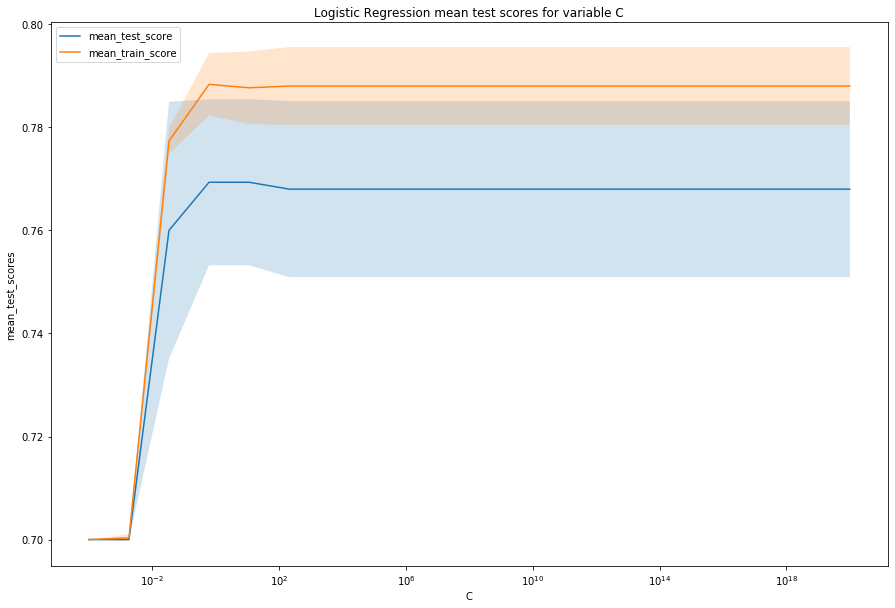

In [104]:
lr_cvalues = np.logspace(-4, 20, 20)
lr_mean_test_scores = np.asarray(grid_lr.cv_results_['mean_test_score'])
lr_mean_train_scores = np.asarray(grid_lr.cv_results_['mean_train_score'])
std_test = np.asarray(grid_lr.cv_results_['std_test_score'])
std_train = np.asarray(grid_lr.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(lr_cvalues, lr_mean_test_scores, label='mean_test_score')
ax.plot(lr_cvalues, lr_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(lr_cvalues, lr_mean_test_scores + std_test, lr_mean_test_scores - std_test, alpha=0.2)
ax.fill_between(lr_cvalues, lr_mean_train_scores+std_train, lr_mean_train_scores-std_train, alpha=0.2)

ax.set(xlabel='C', ylabel='mean_test_scores',
       title='Logistic Regression mean test scores for variable C')
ax.legend(loc='upper left')

plt.show()

#### For SVC

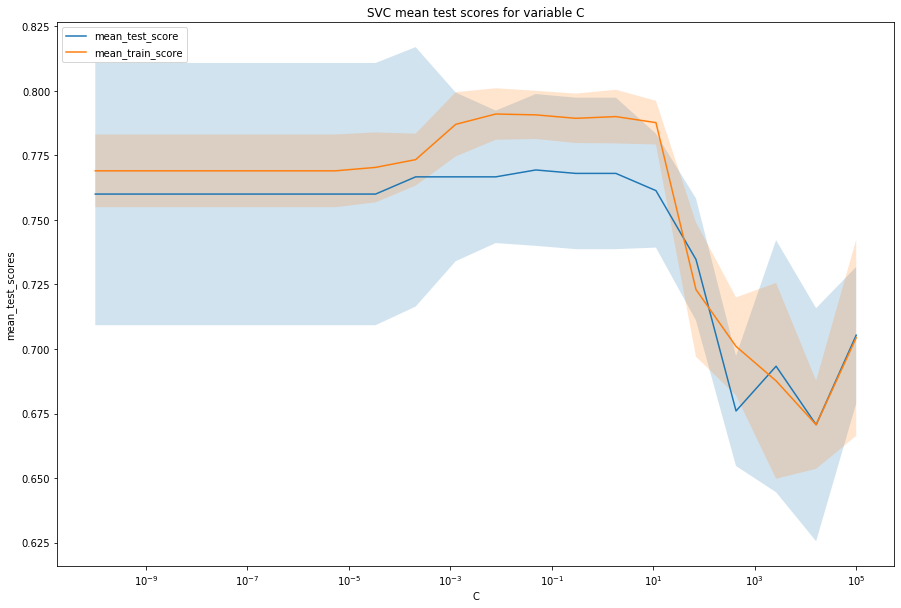

In [105]:
svc_c_values = np.logspace(-10, 5, 20)
svc_mean_test_scores = np.asarray(grid_svc.cv_results_['mean_test_score'])
svc_mean_train_scores = np.asarray(grid_svc.cv_results_['mean_train_score'])
std_test = np.asarray(grid_svc.cv_results_['std_test_score'])
std_train = np.asarray(grid_svc.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(svc_c_values, svc_mean_test_scores, label='mean_test_score')
ax.plot(svc_c_values, svc_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(svc_c_values, svc_mean_test_scores + std_test, svc_mean_test_scores - std_test, alpha=0.2)
ax.fill_between(svc_c_values, svc_mean_train_scores+std_train, svc_mean_train_scores-std_train, alpha=0.2)

ax.set(xlabel='C', ylabel='mean_test_scores',
       title='SVC mean test scores for variable C')
ax.legend(loc='upper left')

plt.show()

#### For KNearestNeighbors

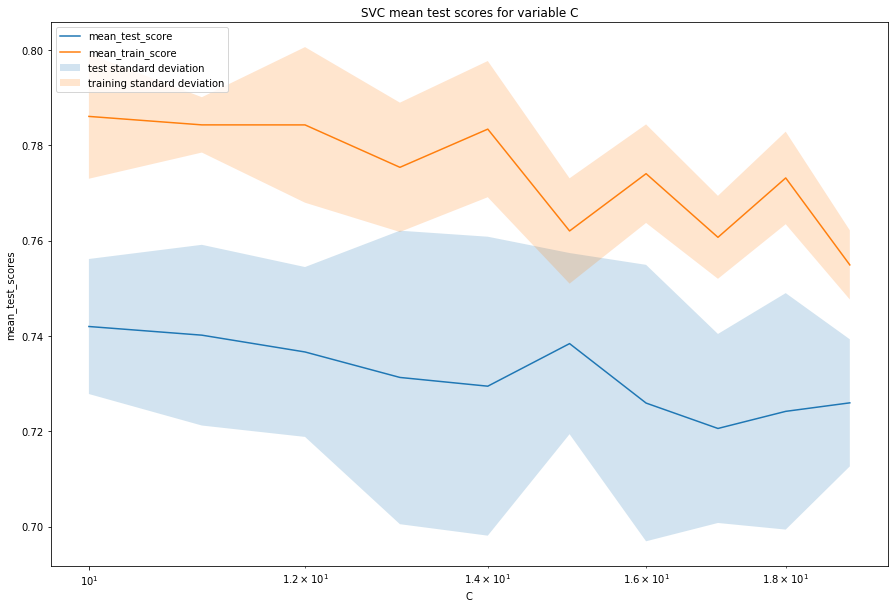

In [106]:
knn_c_values = range(10, 20)
knn_mean_test_scores = np.asarray(grid.cv_results_['mean_test_score'])
knn_mean_train_scores = np.asarray(grid.cv_results_['mean_train_score'])
std_test = np.asarray(grid.cv_results_['std_test_score'])
std_train = np.asarray(grid.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(knn_c_values, knn_mean_test_scores, label='mean_test_score')
ax.plot(knn_c_values, knn_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(knn_c_values, knn_mean_test_scores + std_test, knn_mean_test_scores - std_test, alpha=0.2, label='test standard deviation')
ax.fill_between(knn_c_values, knn_mean_train_scores+std_train, knn_mean_train_scores-std_train, alpha=0.2, label='training standard deviation')

ax.set(xlabel='C', ylabel='mean_test_scores',
       title='SVC mean test scores for variable C')
ax.legend(loc='upper left')

plt.show()

## 1.6
Changing the stratification to K-fold from stratified K fold.
Using the older training and test split data here

In [0]:
kfold1 = KFold(n_splits=5, shuffle=True, random_state=0)
kfold2 = KFold(n_splits=5, shuffle=True, random_state=1)

#### Logistic Regression

In [109]:
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(C=0.615848211066026))
param_grid = {"logisticregression__C" : np.logspace(-4, 20, 20)}
grid_lr = GridSearchCV(lr_pipe, param_grid, cv=skf, return_train_score=True)
grid_lr.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_lr.best_score_))
print("best parameters: {}".format(grid_lr.best_params_))

grid_lrk1 = GridSearchCV(lr_pipe, param_grid, cv=kfold1, return_train_score=True)
grid_lrk1.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_lrk1.best_score_))
print("best parameters: {}".format(grid_lrk1.best_params_))

grid_lrk2 = GridSearchCV(lr_pipe, param_grid, cv=kfold2, return_train_score=True)
grid_lrk2.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_lrk2.best_score_))
print("best parameters: {}".format(grid_lrk2.best_params_))


best mean cross-validation score: 0.772
best parameters: {'logisticregression__C': 0.615848211066026}
best mean cross-validation score: 0.772
best parameters: {'logisticregression__C': 11.288378916846883}
best mean cross-validation score: 0.765
best parameters: {'logisticregression__C': 0.03359818286283781}


Changing the stratification strategy still returns best score for Stratified K fold. For K-fold with random_state = 0, the score was slightly lower, but the value of C was much higher - 11.3. For K fold with random_state = 1, C is way lower at 0.03. It also has the lowest score among the three of them.

#### For SVC

In [110]:
svc_pipe = make_pipeline(StandardScaler(), LinearSVC(C=0.04832930238571752))
param_grid = {"linearsvc__C" : np.logspace(-10, 5, 20)}
grid_svc = GridSearchCV(svc_pipe, param_grid, cv=skf, return_train_score=True)
grid_svc.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_svc.best_score_))
print("best parameters: {}".format(grid_svc.best_params_))

grid_svck1 = GridSearchCV(svc_pipe, param_grid, cv=kfold1, return_train_score=True)
grid_svck1.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_svck1.best_score_))
print("best parameters: {}".format(grid_svck1.best_params_))

grid_svck2 = GridSearchCV(svc_pipe, param_grid, cv=kfold2, return_train_score=True)
grid_svck2.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_svck2.best_score_))
print("best parameters: {}".format(grid_svck2.best_params_))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

best mean cross-validation score: 0.771
best parameters: {'linearsvc__C': 0.2976351441631313}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

best mean cross-validation score: 0.772
best parameters: {'linearsvc__C': 0.007847599703514624}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

best mean cross-validation score: 0.772
best parameters: {'linearsvc__C': 0.007847599703514624}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SKF - 0.771, 0.2976351441631313  
K-Fold (with random_state = 0) - 0.772, 0.007847599703514624  
K-Fold (with random_state = 1) - 0.772, 0.007847599703514624  
Score is almost the same for all the three stratification strategies. C is the same for both K-fold strategies but is higher for Stratified K fold.

#### For KNN

In [112]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))
param_grid = {'kneighborsclassifier__n_neighbors': range(10, 20)}

grid_knn = GridSearchCV(knn_pipe, param_grid, cv=skf, return_train_score=True)
grid_knn.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_knn.best_score_))
print("best parameters: {}".format(grid_knn.best_params_))

grid_knnk1 = GridSearchCV(knn_pipe, param_grid, cv=kfold1, return_train_score=True)
grid_knnk1.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_knnk1.best_score_))
print("best parameters: {}".format(grid_knnk1.best_params_))

grid_knnk2 = GridSearchCV(knn_pipe, param_grid, cv=kfold2, return_train_score=True)
grid_knnk2.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_knnk2.best_score_))
print("best parameters: {}".format(grid_knnk2.best_params_))

best mean cross-validation score: 0.757
best parameters: {'kneighborsclassifier__n_neighbors': 12}
best mean cross-validation score: 0.753
best parameters: {'kneighborsclassifier__n_neighbors': 18}
best mean cross-validation score: 0.763
best parameters: {'kneighborsclassifier__n_neighbors': 12}


We get the best score with K-fold(random_state=1).  
n_neighbors does not vary widely. It is the same (12) for SKF and K-fold(random_state=1) but 18 for K-fold(random_state=0)

Now creating a new training test split with a different random seed

In [0]:
X_trainval16, X_test16, y_trainval16, y_test16 = train_test_split(credit_dataX_ordinal, y, random_state=10)

Now repeat the experiments from above

In [121]:
# Logistic regression
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(C=0.03359818286283781))
param_grid = {"logisticregression__C" : np.logspace(-4, 20, 20)}
grid_lr = GridSearchCV(lr_pipe, param_grid, cv=skf, return_train_score=True)
grid_lr.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score for Logistic regression Stratified K-Fold: {:.3f}".format(grid_lr.best_score_))
print("best parameters: {}".format(grid_lr.best_params_))

grid_lrk1 = GridSearchCV(lr_pipe, param_grid, cv=kfold1, return_train_score=True)
grid_lrk1.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score for Logistic regression K-fold with random state 0: {:.3f}".format(grid_lrk1.best_score_))
print("best parameters: {}".format(grid_lrk1.best_params_))

grid_lrk2 = GridSearchCV(lr_pipe, param_grid, cv=kfold2, return_train_score=True)
grid_lrk2.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score for Logistic regression K-fold with random state 1: {:.3f}".format(grid_lrk2.best_score_))
print("best parameters: {}".format(grid_lrk2.best_params_))

#SVC
svc_pipe = make_pipeline(StandardScaler(), LinearSVC(C=0.04832930238571752))
param_grid = {"linearsvc__C" : np.logspace(-10, 5, 20)}
grid_svc = GridSearchCV(svc_pipe, param_grid, cv=skf, return_train_score=True)
grid_svc.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score SVC Stratified K-Fold: {:.3f}".format(grid_svc.best_score_))
print("best parameters: {}".format(grid_svc.best_params_))

grid_svck1 = GridSearchCV(svc_pipe, param_grid, cv=kfold1, return_train_score=True)
grid_svck1.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score SVC K-fold with random state 0: {:.3f}".format(grid_svck1.best_score_))
print("best parameters: {}".format(grid_svck1.best_params_))

grid_svck2 = GridSearchCV(svc_pipe, param_grid, cv=kfold2, return_train_score=True)
grid_svck2.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score SVC K-fold with random state 1: {:.3f}".format(grid_svck2.best_score_))
print("best parameters: {}".format(grid_svck2.best_params_))


#knn
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=12))
param_grid = {'kneighborsclassifier__n_neighbors': range(10, 20)}

grid_knn = GridSearchCV(knn_pipe, param_grid, cv=skf, return_train_score=True)
grid_knn.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score for KNN Stratified K-Fold: {:.3f}".format(grid_knn.best_score_))
print("best parameters: {}".format(grid_knn.best_params_))

grid_knnk1 = GridSearchCV(knn_pipe, param_grid, cv=kfold1, return_train_score=True)
grid_knnk1.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score for KNN K-fold with random state 0: {:.3f}".format(grid_knnk1.best_score_))
print("best parameters: {}".format(grid_knnk1.best_params_))

grid_knnk2 = GridSearchCV(knn_pipe, param_grid, cv=kfold2, return_train_score=True)
grid_knnk2.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score for KNN K-fold with random state 1: {:.3f}".format(grid_knnk2.best_score_))
print("best parameters: {}".format(grid_knnk2.best_params_))

best mean cross-validation score for Logistic regression Stratified K-Fold: 0.763
best parameters: {'logisticregression__C': 0.615848211066026}
best mean cross-validation score for Logistic regression K-fold with random state 0: 0.756
best parameters: {'logisticregression__C': 0.03359818286283781}
best mean cross-validation score for Logistic regression K-fold with random state 1: 0.761
best parameters: {'logisticregression__C': 11.288378916846883}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

best mean cross-validation score SVC Stratified K-Fold: 0.760
best parameters: {'linearsvc__C': 11.288378916846883}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

best mean cross-validation score SVC K-fold with random state 0: 0.752
best parameters: {'linearsvc__C': 0.0012742749857031347}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

best mean cross-validation score SVC K-fold with random state 1: 0.763
best parameters: {'linearsvc__C': 0.007847599703514624}
best mean cross-validation score for KNN Stratified K-Fold: 0.749
best parameters: {'kneighborsclassifier__n_neighbors': 12}
best mean cross-validation score for KNN K-fold with random state 0: 0.759
best parameters: {'kneighborsclassifier__n_neighbors': 10}
best mean cross-validation score for KNN K-fold with random state 1: 0.747
best parameters: {'kneighborsclassifier__n_neighbors': 12}


**Logistic Regression:**  
> * best mean cross-validation score for Logistic regression Stratified K-Fold: 0.763  
best parameters: {'logisticregression__C': 0.615848211066026}  
* best mean cross-validation score for Logistic regression K-fold with random state 0: 0.756  
best parameters: {'logisticregression__C': 0.03359818286283781}  
* best mean cross-validation score for Logistic regression K-fold with random state 1: 0.761  
best parameters: {'logisticregression__C': 11.288378916846883}

Best score was 0.763 with C=0.615848211066026. The highest score in this case is lower than that of the previous step.

**Linear SVC:**  
> * best mean cross-validation score SVC Stratified K-Fold: 0.760  
best parameters: {'linearsvc__C': 11.288378916846883}  
* best mean cross-validation score SVC K-fold with random state 0: 0.752  
best parameters: {'linearsvc__C': 0.0012742749857031347}   
* best mean cross-validation score SVC K-fold with random state 1: 0.763  
best parameters: {'linearsvc__C': 0.007847599703514624} 

Best score was 0.764 with C=11.288378916846883. C varies in a wide range here, unlike what we noticed in the previous step. Also the overall score is lower in this case.  

**KNeighbors:**  
> * best mean cross-validation score for KNN Stratified K-Fold: 0.749  
best parameters: {'kneighborsclassifier__n_neighbors': 12}  
* best mean cross-validation score for KNN K-fold with random state 0: 0.759  
best parameters: {'kneighborsclassifier__n_neighbors': 10}  
* best mean cross-validation score for KNN K-fold with random state 1: 0.747  
best parameters: {'kneighborsclassifier__n_neighbors': 12}  

Best score was observed for Stratified K-fold and K-fold(random_state=0). The value for n_neighbors varied between 10-15. The highest score in this case is slightly lower than observed in the previous step.

## 1.7
### Plotting performance of best 20 coefficients for Logistic Regression
First we collect all the categorical features from credit_dataX and encode them using OneHot encoding. We then create a full list of feature names by taking the names of numeric features and appending encoded categorical feature names to it.

In [0]:
categorical_fe = credit_dataX[categorical_features]
enc = OneHotEncoder()
enc.fit_transform(categorical_fe)
encoded_categories = list(enc.get_feature_names(categorical_features))
all_features = numeric_features + encoded_categories

Getting the coefficients for Logistic Regression

In [0]:
plr = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
mlr = make_pipeline(plr, LogisticRegression(C=0.03359818286283781))
mlr.fit(X_trainval_pipe, y_trainval_pipe)
coefficients = mlr.steps[1][1].coef_

In [0]:
# convert the above array into an array of tuples
coeff_tuples = []
for index, coeff in enumerate(coefficients[0]):
  coeff_tuples.append((index, coeff))
sorted_tuples = sorted(coeff_tuples, key = lambda x: x[1])


Collecting the best 20 coefficients based on their value and then mapping them to feature names collected earlier

In [0]:
best_coeff = sorted_tuples[-20:]
indices = [ tup[0] for tup in best_coeff ]
coeffs = [tup[1] for tup in best_coeff]
# map indices to column names
feature_names = []
for index in indices:
  feature_names.append(all_features[index])

Plotting the graph

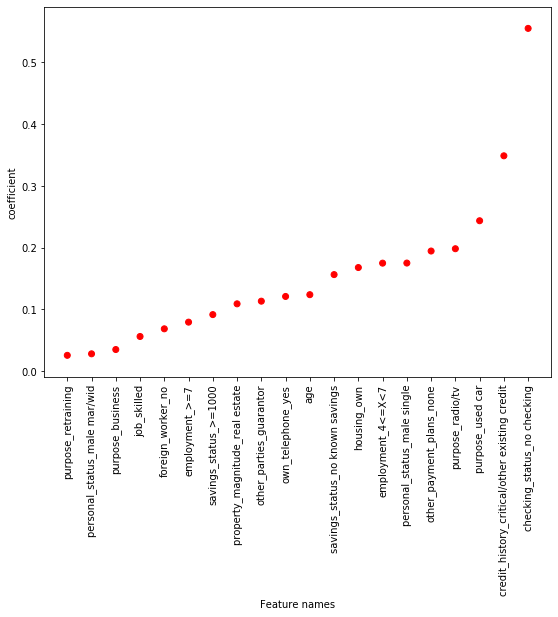

In [119]:
coeffs = [tup[1] for tup in best_coeff]

plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('coefficient')
ax11.scatter(feature_names, coeffs, c=np.sign(coeffs), cmap='bwr_r')
plt.xticks(rotation=90)
plt.show()

### Plotting the best 20 coefficients for Linear SVC

In [0]:
preprocess_svcs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_svcs = make_pipeline(preprocess_svcs, LinearSVC(C=0.04832930238571752))
model_svcs.fit(X_trainval_pipe, y_trainval_pipe)
scores_svcs = cross_val_score(model_svcs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
coefficients = model_svcs.steps[1][1].coef_

In [0]:
coeff_tuples = []
for index, coeff in enumerate(coefficients[0]):
  coeff_tuples.append((index, coeff))
sorted_tuples = sorted(coeff_tuples, key = lambda x: x[1])
best_coeff = sorted_tuples[-20:]
indices = [ tup[0] for tup in best_coeff ]
coeffs = [tup[1] for tup in best_coeff]
feature_names = []
for index in indices:
  feature_names.append(all_features[index])

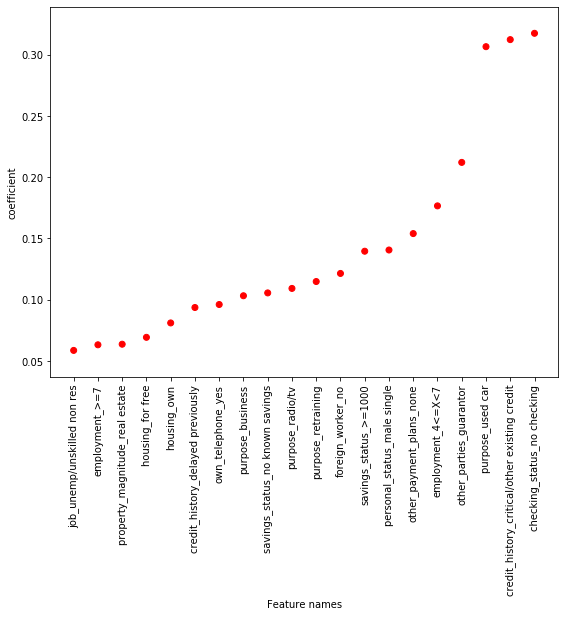

In [124]:
plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('coefficient')
ax11.scatter(feature_names, coeffs, c=np.sign(coeffs), cmap='bwr_r')
plt.xticks(rotation=90)
plt.show()